# Importing Libraries

In [1]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
import numpy as np

# Download Data

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv

* Stopword List: https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-09-18 17:23:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2021-09-18 17:23:37 (193 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [3]:
f = open("/tmp/bbc-text.csv", "r")
print(f.readline())

for i in range(5):
  print(f.readline())
f.close()

category,text

tech,tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bei

In [4]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
len(stopwords)

153

In [5]:
sentences = []
labels = []

with open('/tmp/bbc-text.csv', 'r') as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
      sentence = sentence.replace("  ", " ")
    sentences.append(sentence)


print(len(sentences), len(labels))
print(labels[0])
print(sentences[0])

2225 2225
tech
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us network

# Splitting Data


In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [7]:
train_size = int(len(sentences) * training_portion)
print(train_size)

1780


In [8]:
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
445
445


# Tokenization

In [9]:
tokenizer = Tokenizer(num_words=vocab_size,
                      oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(len(word_index))

27285


# Sequence

In [10]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_sequences = pad_sequences(train_sequences, 
                                       padding=padding_type,
                                       maxlen=max_length)

In [11]:
print(len(train_sequences[0]))
print(len(train_padded_sequences[0]))

449
120


In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded_sequences = pad_sequences(validation_sequences,
                                            maxlen=max_length,
                                            padding=padding_type)
print(len(validation_sequences))
print(validation_padded_sequences.shape)

445
(445, 120)


# Label Tokenizer & Sequences

In [13]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index

print(len(label_word_index))
print(label_word_index)

5
{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [14]:
train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
print(len(train_label_seq))
print(train_label_seq)

1780
[[4]
 [2]
 [1]
 ...
 [1]
 [2]
 [5]]


In [15]:
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(len(validation_label_seq))
print(validation_label_seq)

445
[[5]
 [4]
 [3]
 [1]
 [1]
 [4]
 [2]
 [4]
 [5]
 [5]
 [3]
 [3]
 [2]
 [5]
 [1]
 [5]
 [5]
 [2]
 [1]
 [3]
 [4]
 [2]
 [1]
 [5]
 [4]
 [3]
 [3]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [3]
 [3]
 [4]
 [4]
 [5]
 [3]
 [5]
 [2]
 [3]
 [1]
 [1]
 [2]
 [4]
 [2]
 [4]
 [1]
 [2]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [5]
 [5]
 [3]
 [2]
 [3]
 [3]
 [2]
 [4]
 [3]
 [3]
 [3]
 [3]
 [3]
 [5]
 [5]
 [4]
 [3]
 [1]
 [3]
 [1]
 [4]
 [1]
 [1]
 [1]
 [5]
 [4]
 [5]
 [4]
 [1]
 [4]
 [1]
 [1]
 [5]
 [5]
 [2]
 [5]
 [5]
 [3]
 [2]
 [1]
 [4]
 [4]
 [3]
 [2]
 [1]
 [2]
 [5]
 [1]
 [3]
 [5]
 [1]
 [1]
 [2]
 [3]
 [4]
 [4]
 [2]
 [2]
 [1]
 [3]
 [5]
 [1]
 [1]
 [3]
 [5]
 [4]
 [1]
 [5]
 [2]
 [3]
 [1]
 [3]
 [4]
 [5]
 [1]
 [3]
 [2]
 [5]
 [3]
 [5]
 [3]
 [1]
 [3]
 [2]
 [2]
 [3]
 [2]
 [4]
 [1]
 [2]
 [5]
 [2]
 [1]
 [1]
 [5]
 [4]
 [3]
 [4]
 [3]
 [3]
 [1]
 [1]
 [1]
 [2]
 [4]
 [5]
 [2]
 [1]
 [2]
 [1]
 [2]
 [4]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [4]
 [2]
 [1]
 [1]
 [1]
 [2]
 [5]
 [4]
 [4]
 [4]
 [3]
 [2]
 

# Create Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              input_length=max_length),
    tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [17]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 30

history = model.fit(x=train_padded_sequences,
                    y=train_label_seq,
                    epochs=num_epochs,
                    validation_data=(validation_padded_sequences, validation_label_seq))

Epoch 1/30
56/56 [==============================] - 1s 5ms/step - loss: 1.7597 - accuracy: 0.2236 - val_loss: 1.7211 - val_accuracy: 0.2270
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 1.6737 - accuracy: 0.2303 - val_loss: 1.6238 - val_accuracy: 0.2270
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 1.5616 - accuracy: 0.2646 - val_loss: 1.5021 - val_accuracy: 0.4000
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 1.4130 - accuracy: 0.5697 - val_loss: 1.3490 - val_accuracy: 0.5843
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 1.2310 - accuracy: 0.6702 - val_loss: 1.1664 - val_accuracy: 0.7663
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.8315 - val_loss: 0.9857 - val_accuracy: 0.8112
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.8657 - val_loss: 0.8380 - val_accuracy: 0.8472
Epoch 8/30
56/56 [==

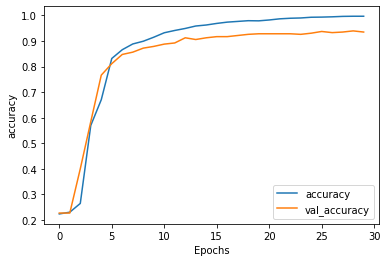

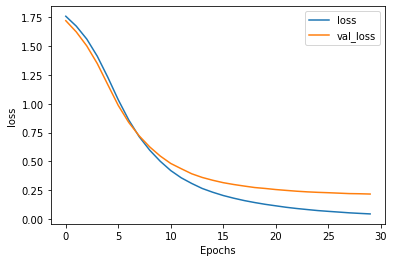

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [21]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [22]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')